In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [6]:
conditionx = pd.read_csv('./childhood_obesity.csv')

In [7]:
conditionx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   2008_proportion         152 non-null    float64
 1   2013_proportion         152 non-null    float64
 2   2018_proportion         152 non-null    float64
 3   2008_male_proportion    152 non-null    float64
 4   2013_male_proportion    152 non-null    float64
 5   2018_male_proportion    152 non-null    float64
 6   2008_female_proportion  152 non-null    float64
 7   2013_female_proportion  152 non-null    float64
 8   2018_female_proportion  152 non-null    float64
 9   change_08_18            152 non-null    float64
 10  budget_clean_air        152 non-null    float64
 11  budget_clean_env        152 non-null    float64
 12  budget_health_training  152 non-null    float64
 13  budget_school_awa       152 non-null    float64
 14  budget_media_awa        152 non-null    fl

In [8]:
conditionx.describe()

,2008_proportion,2013_proportion,2018_proportion,2008_male_proportion,2013_male_proportion,2018_male_proportion,2008_female_proportion,2013_female_proportion,2018_female_proportion,change_08_18,budget_clean_air,budget_clean_env,budget_health_training,budget_school_awa,budget_media_awa,budget_sub_coun
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,0.0031,0.0032,0.0034,0.0022,0.0023,0.0025,0.0039,0.0041,0.0043,0.0003,0.2160,0.2491,0.0948,0.2408,0.1211,0.0781
std,0.0014,0.0014,0.0014,0.0010,0.0010,0.0010,0.0018,0.0018,0.0018,0.0003,0.0833,0.0965,0.0415,0.1023,0.0550,0.0330
min,0.0007,0.0004,0.0010,0.0006,0.0000,0.0007,0.0008,0.0009,0.0012,-0.0006,0.0000,0.0000,0.0000,0.0054,0.0000,0.0000
25%,0.0021,0.0023,0.0025,0.0016,0.0016,0.0018,0.0026,0.0027,0.0030,0.0002,0.1619,0.1801,0.0664,0.1873,0.0768,0.0538
50%,0.0029,0.0030,0.0032,0.0021,0.0022,0.0023,0.0037,0.0037,0.0040,0.0003,0.2255,0.2532,0.0950,0.2362,0.1179,0.0783
75%,0.0037,0.0038,0.0041,0.0026,0.0027,0.0029,0.0047,0.0049,0.0051,0.0005,0.2683,0.3218,0.1206,0.2957,0.1535,0.0969
max,0.0082,0.0085,0.0087,0.0063,0.0068,0.0066,0.0101,0.0101,0.0108,0.0010,0.4286,0.4544,0.2583,1.0000,0.2873,0.2000


Text(0.5, 1.0, 'Correlation Matrix')

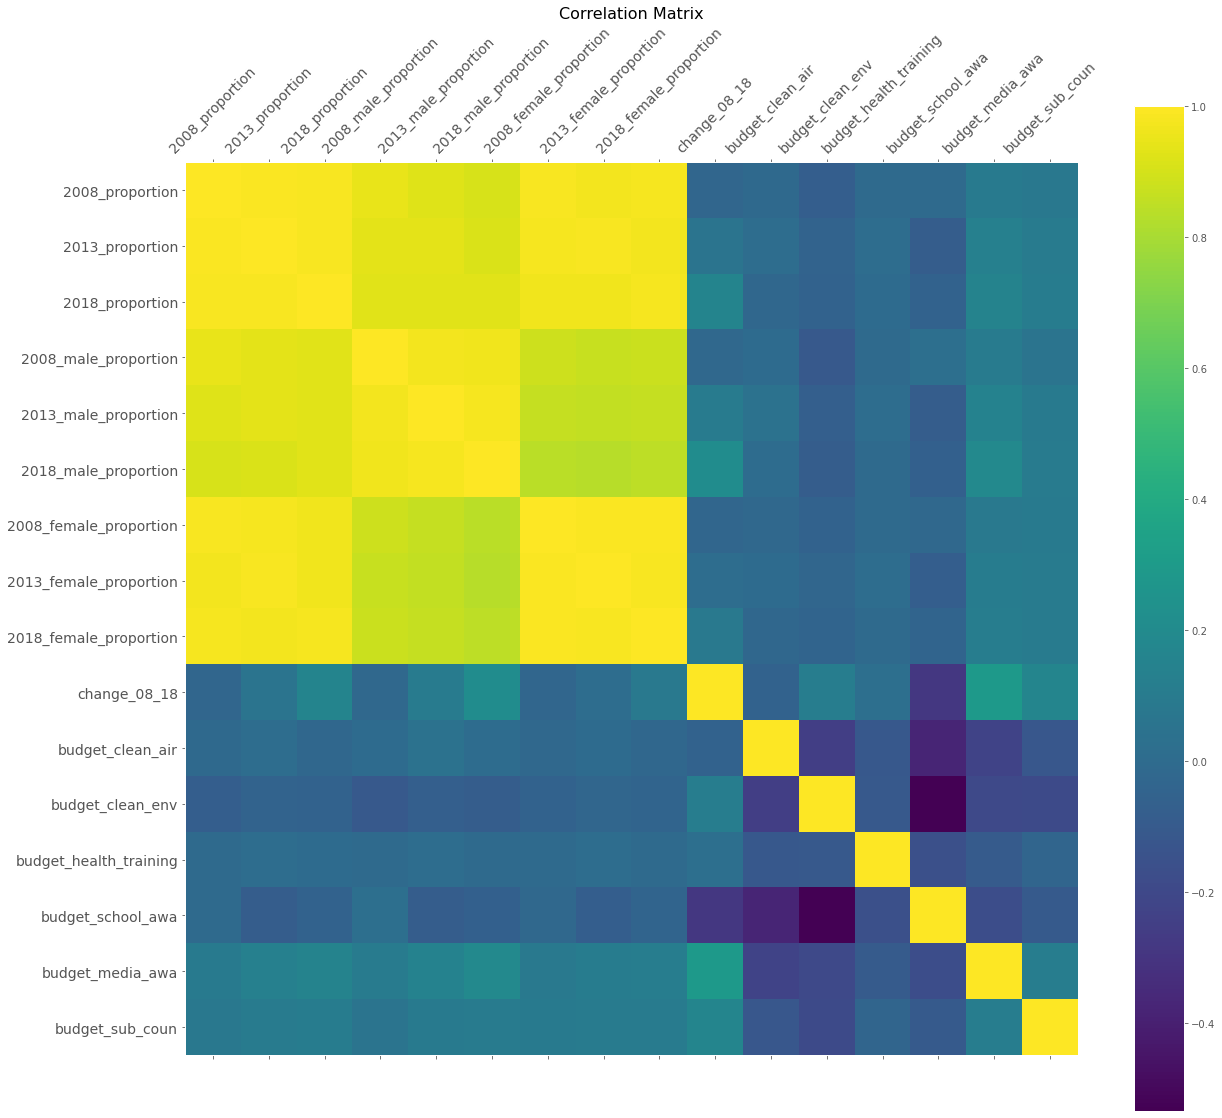

In [26]:
df = conditionx
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(20, 18))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)

In [36]:
conditionx_budget = conditionx.loc[:,['change_08_18', 'budget_clean_env', 'budget_school_awa','budget_media_awa','budget_sub_coun']]

In [38]:
model_conditionx_budget = sm.formula.ols('change_08_18 ~  budget_clean_env + budget_school_awa + budget_media_awa + budget_sub_coun',conditionx_budget).fit()
model_conditionx_budget.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           change_08_18   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     7.096
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.98e-05
Time:                        10:07:57   Log-Likelihood:                 1057.7
No. Observations:                 152   AIC:                            -2105.
Df Residuals:                     147   BIC:                            -2090.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002      0.000      1.038      0.301      -0.000       0.000
budget_clean_env      0.0003      0.000      1.030      0.305      -0.000       0.001
budget_school_awa    -0.0004      0.000     -1.776      0.078      -0.001    4.79e-05
budget_media_awa      0.0012      0.000      3.293      0.001       0.000       0.002
budget_sub_coun       0.0010      0.001      1.669      0.097      -0.000       0.002
==============================================================================
Omnibus:                        4.679   Durbin-Watson:                   0.656
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.877
Skew:                           0.291   Prob(JB):                        0.144
Kurtosis:                       2.477   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [53]:
conditionx_budget_new = drop_column_using_vif_(conditionx_budget.drop('change_08_18', axis=1))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
conditionx_budget = conditionx.loc[:,['change_08_18', 'budget_school_awa','budget_media_awa','budget_sub_coun']]

In [45]:
model_conditionx_budget = sm.formula.ols('change_08_18 ~budget_school_awa + budget_media_awa + budget_sub_coun',conditionx_budget).fit()
model_conditionx_budget.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           change_08_18   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     9.105
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.44e-05
Time:                        10:11:54   Log-Likelihood:                 1057.2
No. Observations:                 152   AIC:                            -2106.
Df Residuals:                     148   BIC:                            -2094.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0003   8.31e-05      3.476      0.001       0.000       0.000
budget_school_awa    -0.0006      0.000     -3.041      0.003      -0.001      -0.000
budget_media_awa      0.0011      0.000      3.128      0.002       0.000       0.002
budget_sub_coun       0.0008      0.001      1.443      0.151      -0.000       0.002
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.832
Skew:                           0.300   Prob(JB):                        0.147
Kurtosis:                       2.505   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
conditionx_budget = conditionx.loc[:,['change_08_18', 'budget_school_awa', 'budget_media_awa']]

In [48]:
model_conditionx_budget = sm.formula.ols('change_08_18 ~ budget_school_awa + budget_media_awa',conditionx_budget).fit()
model_conditionx_budget.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           change_08_18   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     12.53
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           9.37e-06
Time:                        10:13:32   Log-Likelihood:                 1056.1
No. Observations:                 152   AIC:                            -2106.
Df Residuals:                     149   BIC:                            -2097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004   7.03e-05      5.029      0.000       0.000       0.000
budget_school_awa    -0.0006      0.000     -3.155      0.002      -0.001      -0.000
budget_media_awa      0.0012      0.000      3.281      0.001       0.000       0.002
==============================================================================
Omnibus:                        3.877   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.677
Skew:                           0.321   Prob(JB):                        0.159
Kurtosis:                       2.588   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

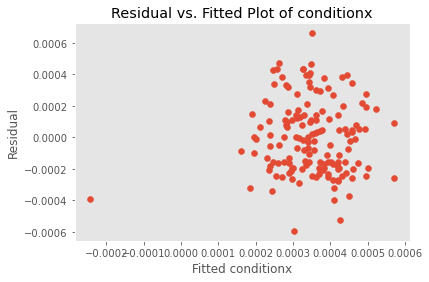

In [49]:
# plot 
plt.scatter(model_conditionx_budget.fittedvalues, model_conditionx_budget.resid)
# adding title and labels
plt.xlabel('Fitted conditionx')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of conditionx')
plt.show()

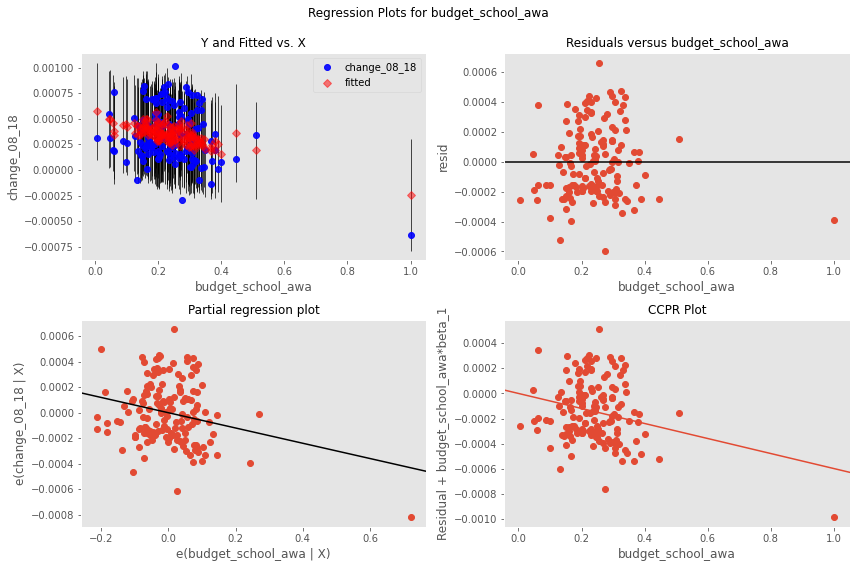

In [51]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_conditionx_budget, 'budget_school_awa', fig=fig)

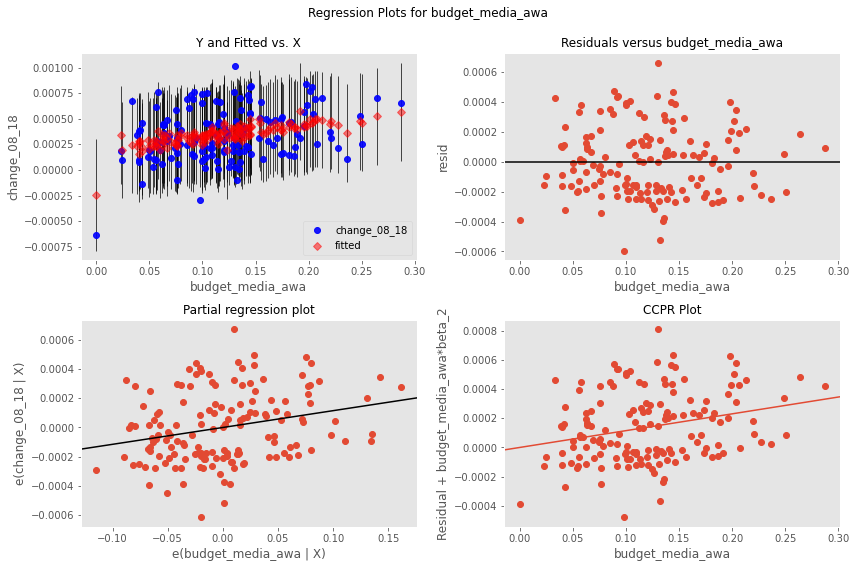

In [52]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_conditionx_budget, 'budget_media_awa', fig=fig)